# Avacado Project

##### Problem discription:

The goal is to predict the average price which is continuous in nature of the different type of avocado and using the region that in which region they are lying.

Fields/Columns:

    Date — The date of the observation
    Average Price — the average price of a single avocado
    type — conventional or organic
    year — the year
    Region — the city or region of the observation
    Total Volume — Total number of avocados sold
    4046 — Total number of avocados with PLU 4046 sold
    4225 — Total number of avocados with PLU 4225 sold
    4770 — Total number of avocados with PLU 4770 sold

In [43]:
#importing libraries:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import zscore
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [51]:
#importing all Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, gradient_boosting
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore

I am importing the all library which I required for EDA, visualization, prediction and finding all matrices. The reason of doing this is that it become easier to use all the import statement at one go and we do not require to import the statement again at each point. We could find all the importing statement at one place without finding it on whole notebook and can update also.

Loading dataset into variable:
    

In [6]:
import pandas as pd
df=pd.read_csv("E:\data trained\Social-Media-Marketing-Plan-Sample-Template.zip")

In [8]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Here I am loading the data set into a variable i.e. “df” and processing the first 5 rows. As in this data set most of the column are float in nature and type and sex is of categorical value.

### Exploratory Analysis:

In [9]:
#as we drop index column because it just kind of id which have no effect on dataset
df.drop('index', inplace= True, axis=1)

KeyError: "['index'] not found in axis"

In [10]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [12]:
# checking the total rows and columns
df.shape

(18249, 14)

In [13]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [14]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

As seen in data set there is one index column which does not play any important role for prediction in the price of avocado, so I am dropping that column.

Also, I am checking the shape of the data set as there are 18249 rows and 13 columns after deleting the index column.

Also, most of the column are of same data type that is float and Date, type and region is of object data type.


<AxesSubplot:>

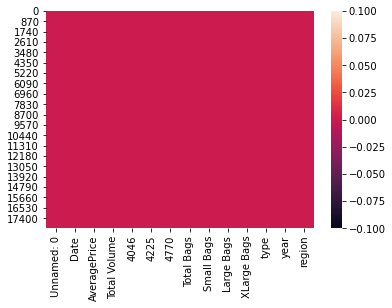

In [15]:
#checking null values using heatmap
sns.heatmap(df.isnull())

Above I am checking the null values, as find there are no null values in the data set because the red color is distributed equally correspond to each column.

In [18]:
#checking the mean of price at each year of organic type of avacado
organic.groupby('year')['AveragePrice'].mean()

NameError: name 'organic' is not defined

In [17]:
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

In above, I am finding that year 2017 is aggressive year where avocado price is higher as compared to other year and 2015 is at second number.

Also, I am finding that at each year present in the data set, which type of avocado is has total count, so both type of avocado is present almost in same amount in the data set.

In [19]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Above statistics data show that their multiple outliers mostly in XLargeBags There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction

    Also, number of rows in each column are same, means there are no null values in the data set.
    Also, the mean and 50%value of most of the column are same and the STD and mean are very close to each other.
    Most of the column statistics data are near to 0 values.
    By checking the difference between the 75% and max value there are outliers in some of the column, I will check it soon.

## Data visualization:

In this portion we can plot different graph using different columns and try to visualize the data using matplotlib and seaborn library.

We use different graph include:

    Bar plot
    Count plot
    Line plot
    Histogram and Pair plot

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

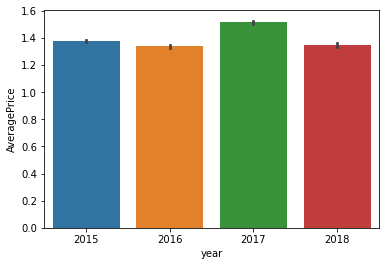

In [20]:
#checking ratio of yearand price that which year had max average price
sns.barplot(x='year', y="AveragePrice", data=df)

so above graph showing that 2017 year is that era where maximun price is there

In [21]:
#checking the ratio of month and price that which year had max average price
sns.barplot(x="Month, y= "AveragePrice",data=df)

SyntaxError: invalid syntax (<ipython-input-21-0edbbe5ad1cb>, line 2)

<AxesSubplot:xlabel='Date', ylabel='AveragePrice'>

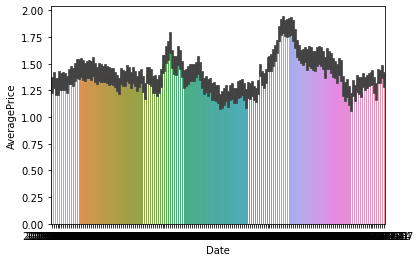

In [25]:
sns.barplot(x = "Date" , y = "AveragePrice" , data=df)


# Plotting histogram

    A histogram shows the frequency on the vertical axis and the horizontal axis is another dimension. Usually it has bins, where every bin has a minimum and maximum value. Each bin also has a frequency between x and infinite
    So, in this we can also check whether the graph is right skewed, left skew or the graph is normally distributed graph

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>],
       [<AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

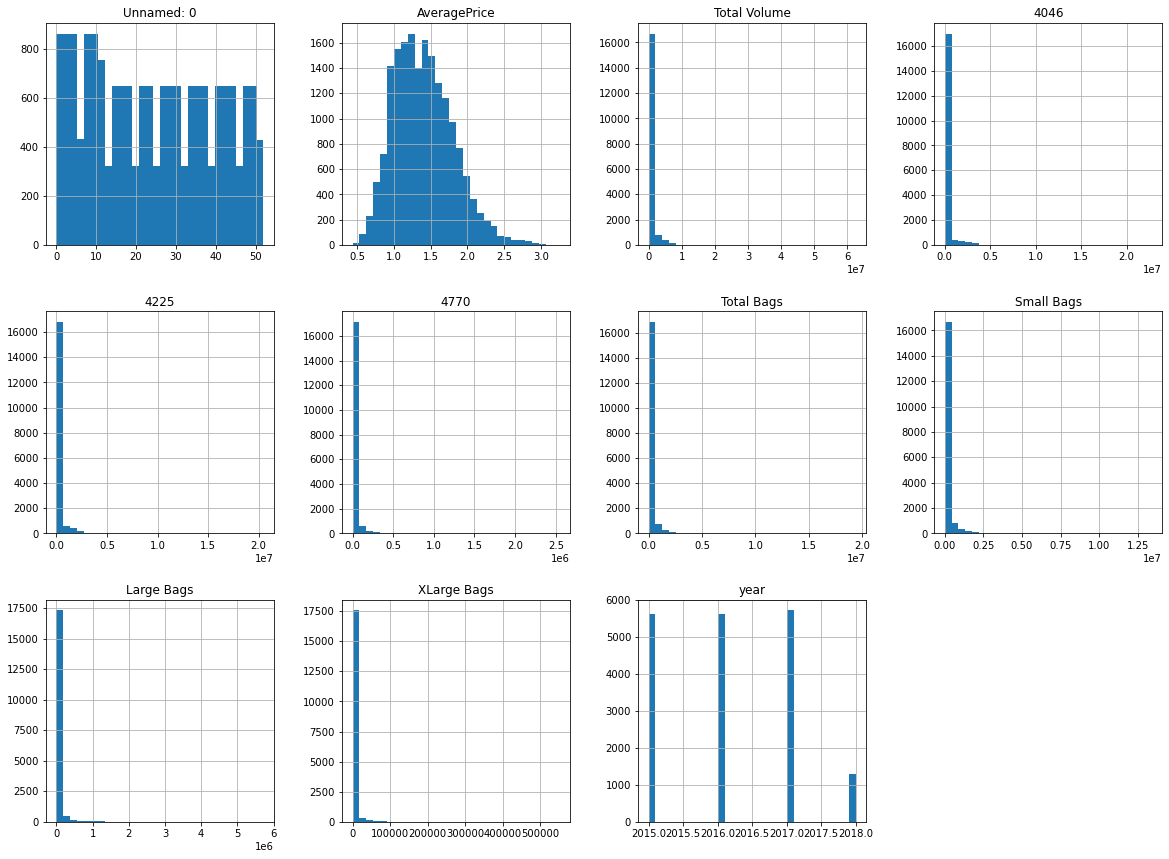

In [27]:
df.hist(figsize=(20,20), grid=True, layout=(4,4), bins=30)

From plotting this histogram, I used the bin size as 30, we can take any bin size (suited as per as data).

    Average price column is normally distributing over the histogram.
    Rest of the data are not much varying in term of numbers, so they are almost left skewed data
    To make the column as normal distributed we can use different methods, but I am using numPy log to make the skew values as normal distributed.

In [28]:
df.skew()

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

In [31]:
#making the skew less than or equal to 0.55 for better prediction and plotting normal distribution
skew=('Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags' )
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In above image we are first calculating the skew value and some of the column skew value are far from zero.

    The best skew value for normally distributes is very close to zero, so we are using “log1p” method to make the skew value near to zero
    In the last cell I am again checking the skewness value and there is difference between the first skewness value and second, now the skewness value of each column is near to zero.
    Making the skewness value near to zero will help to get better score

### outliers

for Avagado problem, first check the outliers of each column


Unnamed: 0          AxesSubplot(0.125,0.71587;0.133621x0.16413)
AveragePrice     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Total Volume      AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4046             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
4770               AxesSubplot(0.125,0.518913;0.133621x0.16413)
Total Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Small Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
Large Bags      AxesSubplot(0.606034,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.766379,0.518913;0.133621x0.16413)
year               AxesSubplot(0.125,0.321957;0.133621x0.16413)
dtype: object

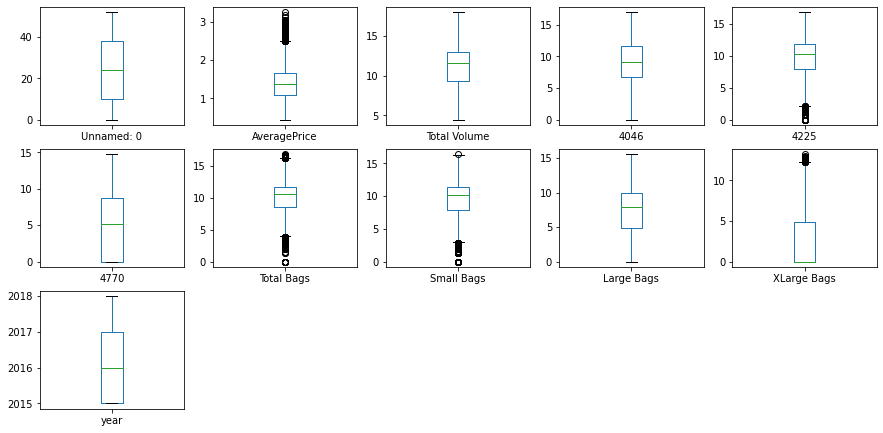

In [32]:
#plotting the boxplot of each column to check the outliers
df.plot(kind='box', subplots= True, layout=(4,5), figsize=(15,10))

From above image we can clear see that there are number of black dots in most of the column which are referring to the outliers, so it means most of the data are outside the distribution.

So now we detect the outliers now the second step is to remove the outliers, there are different way to remove the outliers that are find the IQR, zscore values.

I am using both zscore value then I again check if there are some of the outliers then I will remove it by replacing the outliers with the mean value of that column.


In [50]:
#calculate the zscore
z = np.abs(zscore(df))
print(z)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

### Correlation matrix

Correlation Matrix is basically a covariance matrix. A summary measure called the correlation describes the strength of the linear association. Correlation summarizes the strength and direction of the linear (straight-line) association between two quantitative variables. Denoted by r, it takes values between -1 and +1.

Now I am finding the correlation value of each column, this value is categorized into mainly 2 parts that are:

- Positive correlated value

- Negative correlated value

I am using seaborn heatmap to plot the correlated matrix and plot the corr value in the heatmap graph

[]

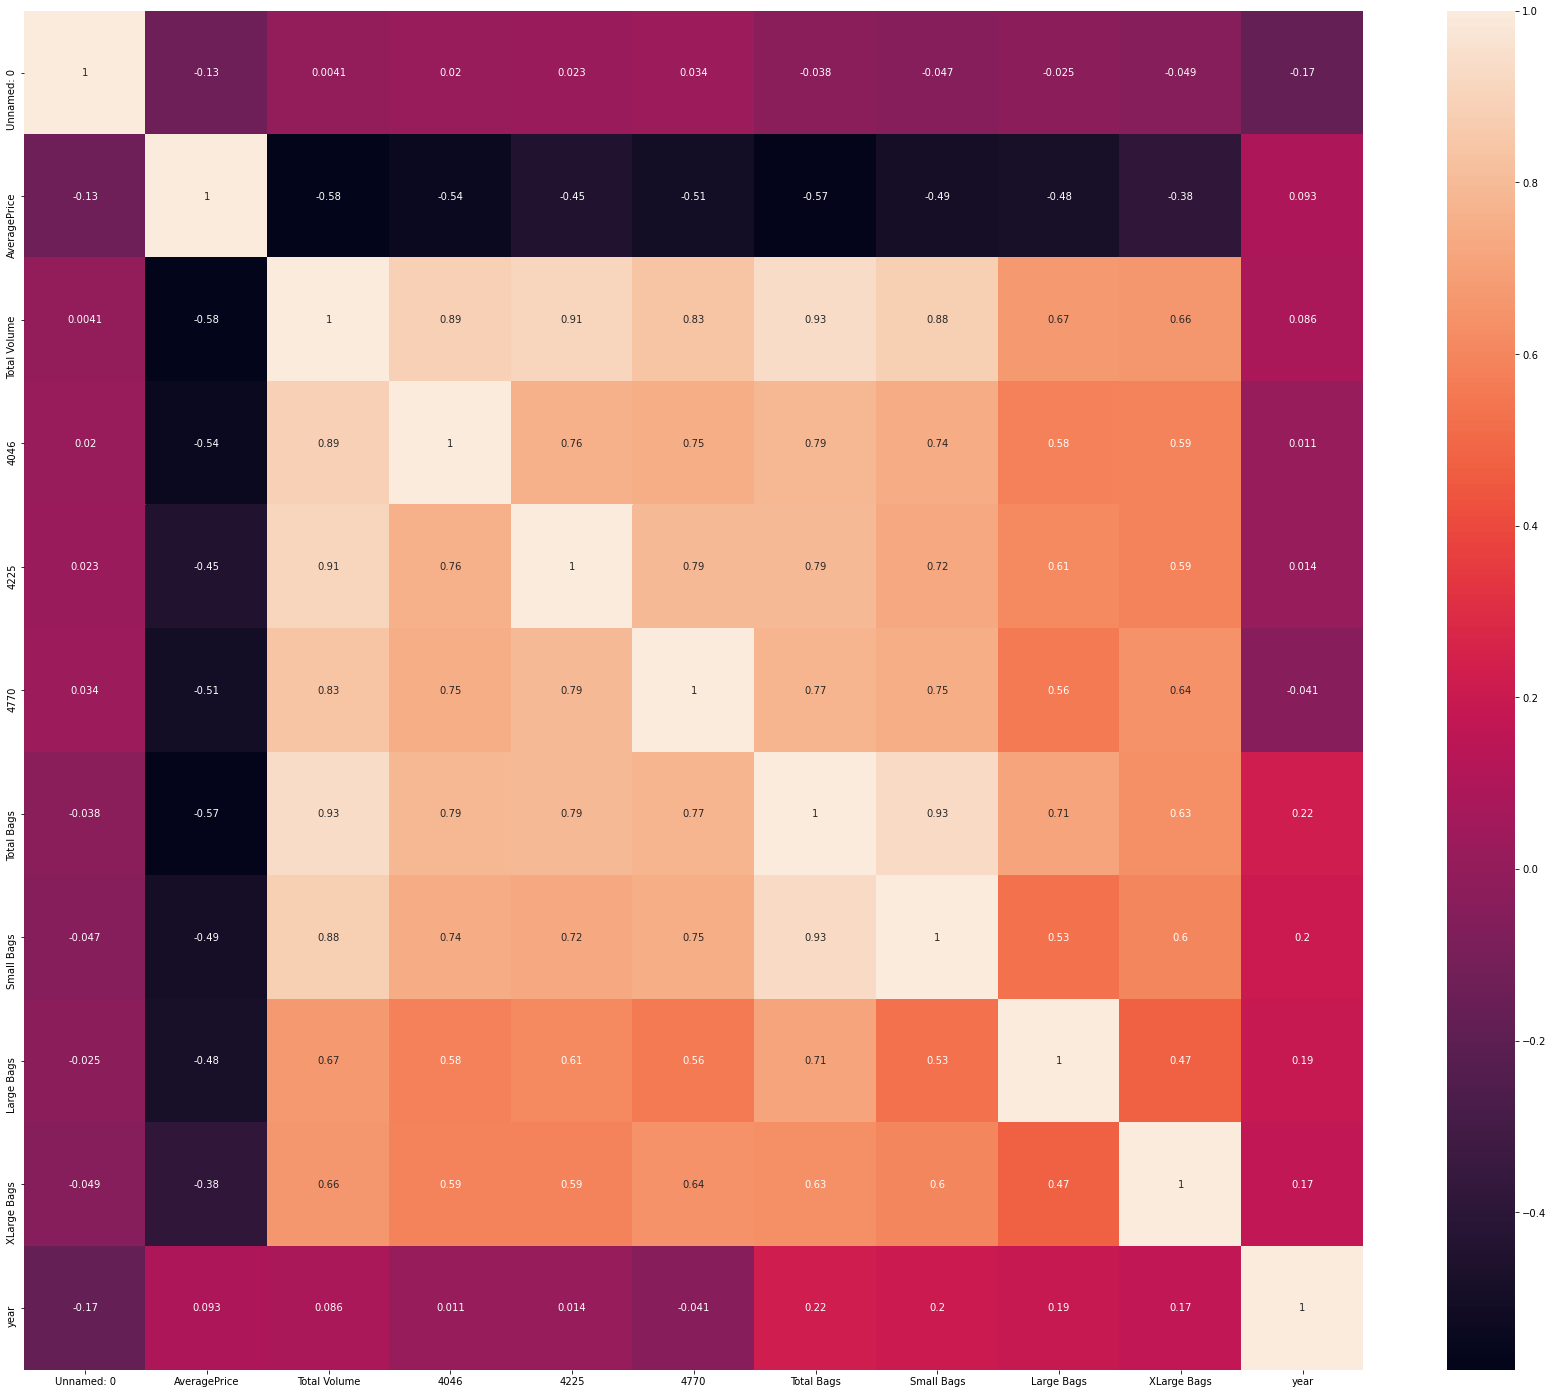

In [35]:
#checking the correlation of all the columns to eaxh other
df_cor=df.corr()
plt.figure(figsize=(30,25))
sns.heatmap(df_cor,annot=True)
plt.plot()

### Drop and standard Scaler:

Here I am making two variable x and y where x is having all column except Average Price and Date, we can also drop the Date column, but I kept for EDA purpose and y is having only Rings column.

Also, I am using the standard scaling method on x variable

### Prediction with Average Price:

# now by using multiple algorithms we are calculating the best Algo which suits the best for data set

In [56]:


model= [KNeighborsRegressor(), AdaBoostRegressor(), LinearRegression (), GradientBoostingRegressor()]

max_r2_score= 0
for r_state in range(40,90):
    train_x,test_x,train_y,test_y = train_test_split(x, y, random_state= r_state, test_size = 0.33)
    for i in model:
        i.fit(train_x, train_y)
        pre = i.predict(test_x)
        r2_sc = r2_score(test_y, pre)
        print("R2 score correspond to random state",r_state,"is", r2_sc)
        if r2_sc> max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            final_model= i

print()
print()
print()
print()
print("max R2 score correspond to random state ", final_state, "is", max_r2_score, "and model is", final_model)



NameError: name 'KNeighborsRegressor' is not defined

In [55]:
#importing library for classification prediction
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeclassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

ImportError: cannot import name 'DecisionTreeclassifier' from 'sklearn.tree' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\__init__.py)